<a href="https://colab.research.google.com/github/dipanjanS/improving-RAG-systems-dhs2024/blob/main/Demo_1_Solutions_for_Missing_Content_in_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solutions for Missing Content in RAG

Here we will explore the following strategies

- Better Data Cleaning
- Better Prompting
- Agentic RAG with Tools


## Exploring Useful Data Loaders

#### Install OpenAI, HuggingFace and LangChain dependencies

In [ ]:
!pip install langchain
!pip install langchain-openai
!pip install langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 986.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.3/377.3 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2

In [ ]:
# takes 2 - 5 mins to install on Colab
!pip install "unstructured[all-docs]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached

In [ ]:
# install OCR dependencies for unstructured
!sudo apt-get install tesseract-ocr
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,720 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!pip install pymupdf==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 101.4 MB/s eta 0:00:00


#### PDF Loaders

[Portable Document Format (PDF)](https://en.wikipedia.org/wiki/PDF), standardized as ISO 32000, is a file format developed by Adobe in 1992 to present documents, including text formatting and images, in a manner independent of application software, hardware, and operating systems.

LangChain integrates with a host of PDF parsers. Some are simple and relatively low-level; others will support OCR and image-processing, or perform advanced document layout analysis. The right choice will depend on your use-case and through experimentation.

Here we will see how to load PDF documents into the LangChain `Document` format

We download a research paper to experiment with

If the following command fails you can download the paper manually by going to http://arxiv.org/pdf/2103.15348.pdf, save it as `layoutparser_paper.pdf`and upload it on the left in Colab from the upload files option

In [ ]:
!wget -O 'layoutparser_paper.pdf' 'http://arxiv.org/pdf/2103.15348.pdf'

--2024-07-27 06:58:49--  http://arxiv.org/pdf/2103.15348.pdf
Resolving arxiv.org (arxiv.org)... 151.101.3.42, 151.101.131.42, 151.101.67.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.3.42|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://arxiv.org/pdf/2103.15348 [following]
--2024-07-27 06:58:49--  http://arxiv.org/pdf/2103.15348
Reusing existing connection to arxiv.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 4686220 (4.5M) [application/pdf]
Saving to: ‘layoutparser_paper.pdf’

layoutparser_paper. 100%[===================>]   4.47M  14.0MB/s    in 0.3s    

2024-07-27 06:58:49 (14.0 MB/s) - ‘layoutparser_paper.pdf’ saved [4686220/4686220]



#### PyMuPDFLoader

This is the fastest of the PDF parsing options, and contains detailed metadata about the PDF and its pages, as well as returns one document per page. It uses the `pymupdf` library internally.

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader("./layoutparser_paper.pdf")
pages = loader.load()

In [ ]:
len(pages)

16

In [ ]:
pages[0]

Document(metadata={'source': './layoutparser_paper.pdf', 'file_path': './layoutparser_paper.pdf', 'page': 0, 'total_pages': 16, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': 'LaTeX with hyperref', 'producer': 'pdfTeX-1.40.21', 'creationDate': 'D:20210622012710Z', 'modDate': 'D:20210622012710Z', 'trapped': ''}, page_content='LayoutParser: A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1 (\x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1 Allen Institute for AI\nshannons@allenai.org\n2 Brown University\nruochen zhang@brown.edu\n3 Harvard University\n{melissadell,jacob carlson}@fas.harvard.edu\n4 University of Washington\nbcgl@cs.washington.edu\n5 University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily de

In [ ]:
pages[0].metadata

{'source': './layoutparser_paper.pdf',
 'file_path': './layoutparser_paper.pdf',
 'page': 0,
 'total_pages': 16,
 'format': 'PDF 1.5',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': 'LaTeX with hyperref',
 'producer': 'pdfTeX-1.40.21',
 'creationDate': 'D:20210622012710Z',
 'modDate': 'D:20210622012710Z',
 'trapped': ''}

In [ ]:
print(pages[0].page_content)

LayoutParser: A Uniﬁed Toolkit for Deep
Learning Based Document Image Analysis
Zejiang Shen1 ( ), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain
Lee4, Jacob Carlson3, and Weining Li5
1 Allen Institute for AI
shannons@allenai.org
2 Brown University
ruochen zhang@brown.edu
3 Harvard University
{melissadell,jacob carlson}@fas.harvard.edu
4 University of Washington
bcgl@cs.washington.edu
5 University of Waterloo
w422li@uwaterloo.ca
Abstract. Recent advances in document image analysis (DIA) have been
primarily driven by the application of neural networks. Ideally, research
outcomes could be easily deployed in production and extended for further
investigation. However, various factors like loosely organized codebases
and sophisticated model conﬁgurations complicate the easy reuse of im-
portant innovations by a wide audience. Though there have been on-going
eﬀorts to improve reusability and simplify deep learning (DL) model
development in disciplines like natural language processing

In [ ]:
print(pages[4].page_content)

LayoutParser: A Uniﬁed Toolkit for DL-Based DIA
5
Table 1: Current layout detection models in the LayoutParser model zoo
Dataset
Base Model1 Large Model
Notes
PubLayNet [38]
F / M
M
Layouts of modern scientiﬁc documents
PRImA [3]
M
-
Layouts of scanned modern magazines and scientiﬁc reports
Newspaper [17]
F
-
Layouts of scanned US newspapers from the 20th century
TableBank [18]
F
F
Table region on modern scientiﬁc and business document
HJDataset [31]
F / M
-
Layouts of history Japanese documents
1 For each dataset, we train several models of diﬀerent sizes for diﬀerent needs (the trade-oﬀbetween accuracy
vs. computational cost). For “base model” and “large model”, we refer to using the ResNet 50 or ResNet 101
backbones [13], respectively. One can train models of diﬀerent architectures, like Faster R-CNN [28] (F) and Mask
R-CNN [12] (M). For example, an F in the Large Model column indicates it has a Faster R-CNN model trained
using the ResNet 101 backbone. The platform is maintained and

#### UnstructuredPDFLoader

[Unstructured.io](https://unstructured-io.github.io/unstructured/) supports a common interface for working with unstructured or semi-structured file formats, such as Markdown or PDF. LangChain's [`UnstructuredPDFLoader`](https://api.python.langchain.com/en/latest/document_loaders/langchain_community.document_loaders.pdf.UnstructuredPDFLoader.html) integrates with Unstructured to parse PDF documents into LangChain [`Document`](https://api.python.langchain.com/en/latest/documents/langchain_core.documents.base.Document.html) objects.

In [ ]:
from langchain_community.document_loaders import UnstructuredPDFLoader

Load PDF with complex parsing, table detection and chunking by sections

In [ ]:
# takes 3-4 mins on Colab
loader = UnstructuredPDFLoader('./layoutparser_paper.pdf',
                               strategy='hi_res',
                               extract_images_in_pdf=True,
                               infer_table_structure=True,
                               chunking_strategy="by_title", # section-based chunking
                               max_characters=4000, # max size of chunks
                               new_after_n_chars=3800, # preferred size of chunks
                               combine_text_under_n_chars=2000, # smaller chunks < 2000 chars will be combined into a larger chunk
                               mode='elements')
data = loader.load()

In [ ]:
len(data)

18

In [ ]:
[doc.metadata['category'] for doc in data]

['CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement']

In [ ]:
data[0]

Document(metadata={'source': './layoutparser_paper.pdf', 'filetype': 'application/pdf', 'languages': ['eng'], 'last_modified': '2023-01-23T09:15:33', 'page_number': 1, 'orig_elements': 'eJzNWG1v3DYS/itz+yk5rFS9US/+cnZi4OLWvQsS93poGhiUONplIokCSa2zCfrfb0jJ9iZ2C8SAjfu0yyGH8/I8M8Pdd19W2GGPg72UYnUEqxbbtIjrLKgwboMMS/pWZnmQlwmmVZ02TZas1rDq0XLBLSedL6tGKS3kwC0av+74Xk32cotys7UkSZIoIp1FfCWF3ZI0Lrx0VHKwTu/du4yF2RpYlYTF+zUsyyJKw9It4ygKq7vr+TgJVmZvLPYuitfyE3ZvR97g6g/aaGWHdj+i33r988r7MmwmvvEOv1vhsFm991JjL3slZCvRpyOJkjSI4iBJL6LqKGZHaeq0R9K8HKa+Ru0CcTYsfnKhrmJIIAKfo2uTvwwNpWajtPyM4sKdI4VvEy/amOVFWweYJjklnscBR5YFecJrwSJMEqweOfF5zkJ2m/g4S1lYHWT6jmBW+MvUC7TYWKmGy4aSay5HrWo6FoUsi9L8ibEZYIIfwSH0Hv4DLyEEAw2ZOMDqFXJBivcBJHIeNVEeFFhEQZbwPKjbtA7iKmt4VrUsZo9dGXFUZWFygBBjLMwPEbojmDX+b6ojgR2UkEEKjHAI6TPyeByRXMJ/QQP/7srhcVG0jDBhGWcETB0FVZ2LIGV1xKo4zzl/RGCoJIjGaVyEqQdmXmdRFUYeh6RgYXSPYNZ4aO1kRfHEyJ37TLzm2qA+ghP4ZZC/T20dxSjgQqnuo7TQKg2niCOcI9eDHDbwghvaP1XN5ACDs54MwMnAu72R5hDpC2k7vA/dsi4Ya4QI2hLrIONVEtScYZCzBssmzjEuyk

In [ ]:
print(data[0].page_content)

1 2 0 2

n u J 1 2 ] V C . s c [

2 v 8 4 3 5 1 . 3 0 1 2 : v i X r a

LayoutParser: A Uniﬁed Toolkit for Deep Learning Based Document Image Analysis

Zejiang Shen! (4), Ruochen Zhang”, Melissa Dell?, Benjamin Charles Germain Lee*, Jacob Carlson’, and Weining Li®

1 Allen Institute for AI shannons@allenai.org 2 Brown University ruochen zhang@brown.edu 3 Harvard University {melissadell,jacob carlson}@fas.harvard.edu 4 University of Washington bcgl@cs.washington.edu 5 University of Waterloo w422li@uwaterloo.ca

Abstract. Recent advances in document image analysis (DIA) have been primarily driven by the application of neural networks. Ideally, research outcomes could be easily deployed in production and extended for further investigation. However, various factors like loosely organized codebases and sophisticated model conﬁgurations complicate the easy reuse of im- portant innovations by a wide audience. Though there have been on-going eﬀorts to improve reusability and simplify deep learn

In [ ]:
data[5]

Document(metadata={'source': './layoutparser_paper.pdf', 'last_modified': '2023-01-23T09:15:33', 'text_as_html': "<table><thead><tr><th>Dataset</th><th>| Base Model'|</th><th>| Notes</th></tr></thead><tbody><tr><td>PubLayNet B8]|</td><td>F/M</td><td>Layouts of modern scientific documents</td></tr><tr><td>PRImA</td><td>M</td><td>Layouts of scanned modern magazines and scientific report</td></tr><tr><td>Newspaper</td><td>F</td><td>Layouts of scanned US newspapers from the 20th century</td></tr><tr><td>TableBank</td><td>F</td><td>Table region on modern scientific and business document</td></tr><tr><td>HJDataset</td><td>F/M</td><td>Layouts of history Japanese documents</td></tr></tbody></table>", 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 5, 'orig_elements': 'eJyVVG1vm0AM/isWX/alhLewkKqqtGqKtqqpqrX7lCF0cA6gAYe4Qy1r+9/nO0IaKVnV6RLFNn78nO0nbJ4trLDGRiUlt87B8hfh3Gehb6dRmNlzfx7YbLlY2ssoyjhbcC8KmXUGVo2KcaYYYZ6tTIiOlw1TKI1fsUH0KimwzAtFEd93XcLswo8lVwVFvYWJtqJslMZtNsFiOQvPI

In [ ]:
data[5].page_content

'Dataset Base Model1 Large Model Notes PubLayNet [38] PRImA [3] Newspaper [17] TableBank [18] HJDataset [31] F / M M F F F / M M - - F - Layouts of modern scientiﬁc documents Layouts of scanned modern magazines and scientiﬁc reports Layouts of scanned US newspapers from the 20th century Table region on modern scientiﬁc and business document Layouts of history Japanese documents'

In [ ]:
from IPython.display import HTML

HTML(data[5].metadata['text_as_html'])

Dataset,| Base Model'|,| Notes
PubLayNet B8]|,F/M,Layouts of modern scientific documents
PRImA,M,Layouts of scanned modern magazines and scientific report
Newspaper,F,Layouts of scanned US newspapers from the 20th century
TableBank,F,Table region on modern scientific and business document
HJDataset,F/M,Layouts of history Japanese documents


In [ ]:
! ls -l ./figures

total 336
-rw-r--r-- 1 root root 89611 Jul 27 07:20 figure-10-4.jpg
-rw-r--r-- 1 root root 42187 Jul 27 07:20 figure-11-5.jpg
-rw-r--r-- 1 root root 62655 Jul 27 07:20 figure-13-6.jpg
-rw-r--r-- 1 root root 36497 Jul 27 07:20 figure-4-1.jpg
-rw-r--r-- 1 root root 31580 Jul 27 07:20 figure-6-2.jpg
-rw-r--r-- 1 root root 72034 Jul 27 07:20 figure-9-3.jpg


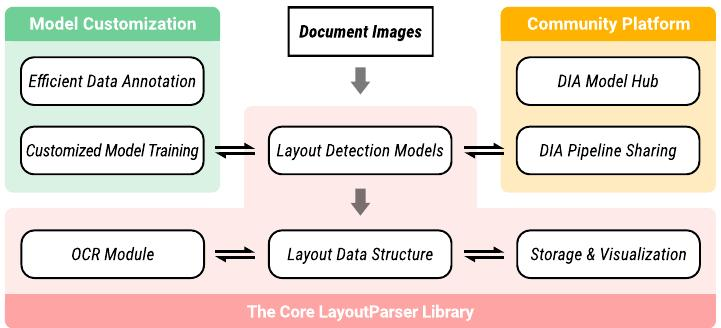

In [ ]:
from IPython.display import Image

Image('./figures/figure-4-1.jpg')

#### Microsoft Office Document Loaders

The Microsoft Office suite of productivity software includes Microsoft Word, Microsoft Excel, Microsoft PowerPoint, Microsoft Outlook, and Microsoft OneNote. It is available for Microsoft Windows and macOS operating systems. It is also available on Android and iOS.

[Unstructured.io](https://docs.unstructured.io/open-source/introduction/overview) provides a variety of document loaders to load MS Office documents. Check them out [here](https://docs.unstructured.io/open-source/core-functionality/partitioning).

Here we will leverage LangChain's [`UnstructuredWordDocumentLoader`](https://api.python.langchain.com/en/latest/document_loaders/langchain_community.document_loaders.word_document.UnstructuredWordDocumentLoader.html) to load data from a MS Word document.

In [ ]:
!gdown 1DEz13a7k4yX9yFrWaz3QJqHdfecFYRV-

Downloading...
From: https://drive.google.com/uc?id=1DEz13a7k4yX9yFrWaz3QJqHdfecFYRV-
To: /content/Intel Strategy.docx
100% 1.13M/1.13M [00:00<00:00, 9.98MB/s]


In [ ]:
from langchain_community.document_loaders import UnstructuredWordDocumentLoader

Load word doc with complex parsing and section based chunks

In [ ]:
loader = UnstructuredWordDocumentLoader('./Intel Strategy.docx',
                                        strategy='fast',
                                        chunking_strategy="by_title",
                                        max_characters=4000, # max limit of a document chunk
                                        new_after_n_chars=3800, # preferred document chunk size
                                        mode='elements')
data = loader.load()

In [ ]:
len(data)

4

In [ ]:
data[0]

Document(metadata={'source': './Intel Strategy.docx', 'emphasized_text_contents': ['The Superpowers', 'Pervasive Connectivity', 'Ubiquitous compute'], 'emphasized_text_tags': ['b', 'b', 'b'], 'file_directory': '.', 'filename': 'Intel Strategy.docx', 'languages': ['eng'], 'last_modified': '2024-07-27T07:21:41', 'orig_elements': 'eJzVV2tv4zYW/SuEP+0CluGHHFvZT0UwOxugmAaYdIuiWwQUeSUTkUiVouzRFP3vey4p5zUZYIotsMgXP/i8j3PPPfzl9xk11JINd0bPLsXsQl9spKIiKzbrTZZXO8qK/W6XqbXa7fd5tV3KYjYXs5aC1DJI7Pl9pmSg2vnxTlMXDhhaYkVlGrrTxpMKmOKzF7Np2MqWeODaBmrEx+B5/7jQTn3iJY209SBr6rHmlxnZevZrHO3DXeu0qQxFU9fLdZ4td9l6d7vcXa5Xl/lq9gcWBvoUvjydDw5jF++9NaEhXvvS+9WyXO91fpHlRLssX+lVVtAyz6REOPKSttvN/o14/8ORvAgHErxTVHQSI0nfz0W8di6cJeGquOLkfKP/M6yXq6IXpalxdxDqYLpW3hNvOUiME1kBW21vgnHW2FoEd5Je90KK1nkSHBCFWHqjhOw676Q64Hxpxc1VNk0sxO3B9MLwphM1yrWEzUeaC+sCbGpGUblkN+Y6aUdRDiGOGWvdUfLd+CkCqYN1jatHAeNwFFzq5diLGxnEe2p6GEh+Lq7e/TC5vBDfKeW8TpaLg2nn6R5YWMdB01J/Po2/e1isMWTs08sP8kiia+CqTgfzvBSdS4ERpwMhGAYRhOcNIQ1IZrwphlj1Q0e+cydENg5otoYj/Z

In [ ]:
print(data[0].page_content)

Intel Strategy

Over the last few years, Intel, one of the world’s biggest chipmakers, has been transitioning towards a more datacentric approach than PC-centric. This is a welcome move, not only for the company but for innovation in technology as well, says Pat Gelsinger, CEO, Intel. According to him, the changing times as well as strides in innovation have placed Intel in a position where it can leverage the “superpowers” to make the world of computing better sustainable and far superior to the present scenario.

The Superpowers

Pervasive connectivity, Ubiquitous compute, AI and Cloud-to-Edge Infrastructure -- the four superpowers that will bolster Intel’s footprints into the future, will also play a key role in transforming the world of computing in any device.

“Each of these superpowers is impressive on its own, but when they come together, that’s magic. If you’re not applying AI to every one of your business processes, you’re falling behind. We’re seeing this across every indust

## Better Prompting for Consistent Results

#### Enter Open AI API Key

In [ ]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


In [ ]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

#### Load Connection to LLM

Here we create a connection to ChatGPT to use later in our chains

In [ ]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0)

#### Problematic RAG Prompt

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt = """You are an assistant for question-answering tasks.
            Give an answer to the following question with the context provided

            Question:
            {question}

            Context:
            {context}

            Answer:
         """

prompt_template = ChatPromptTemplate.from_template(prompt)

In [ ]:
context = """
The cricket world cup champion of 2023 is Australia

The cricket Twenty20 International champion of 2024 is India
"""

question = "Who is the euro 2020 champion?"

qa_rag_chain = (
    prompt_template
      |
    chatgpt
)

In [ ]:
response = qa_rag_chain.invoke({'context': context, 'question': question})
print(response.content)

The euro 2020 champion is Italy.


#### Better RAG Prompt

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt = """You are an assistant for question-answering tasks.
            Use the following pieces of retrieved context to answer the question.
            If no context is present or if you don't know the answer, just say that you don't know.
            Do not make up the answer unless it is there in the provided context.

            Question:
            {question}

            Context:
            {context}

            Answer:
         """

prompt_template = ChatPromptTemplate.from_template(prompt)

In [ ]:
qa_rag_chain = (
    prompt_template
      |
    chatgpt
)

In [ ]:
response = qa_rag_chain.invoke({'context': context, 'question': question})
print(response.content)

I don't know.


## Agentic RAG with Tools

#### Enter Tavily Search Tool API Key

Get a free API key from [here](https://tavily.com/#api)

In [ ]:
TAVILY_API_KEY = getpass('Enter Tavily Search API Key: ')

Enter Tavily Search API Key: ··········


In [ ]:
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY

#### Setup Search Tool

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool
import rich

@tool
def search_web(query: str) -> list:
    """Search the web for a query."""
    tavily_tool = TavilySearchResults(max_results=3,
                                      search_depth='advanced',
                                      max_tokens=10000)
    results = tavily_tool.invoke(query)
    return [doc['content'] for doc in results]

In [ ]:
question

'Who is the euro 2020 champion?'

In [ ]:
search_web(question)

["Italy are the champions of Europe. On Saturday in the Euro 2020 final, the Italians defeated England in a penalty shootout to become the undisputed kings of the continent. The win is Italy's ...",
 "The UEFA Euro 2020 final was an association football match between Italy and England that took place at Wembley Stadium in London, England, on 11 July 2021 to determine the winner of UEFA Euro 2020.It was the 16th final of the UEFA European Championship, a quadrennial tournament contested by the senior men's national teams of the member associations of UEFA to decide the champions of Europe.",
 "The 2020 UEFA European Football Championship, commonly referred to as UEFA Euro 2020 or simply Euro 2020, was the 16th UEFA European Championship, the quadrennial international men's football championship of Europe organised by the Union of European Football Associations (UEFA). To celebrate the 60th anniversary of the European Championship competition, UEFA president Michel Platini declared ..."]

#### Bind Tools to LLM

In [ ]:
tools = [search_web]
chatgpt = ChatOpenAI(model_name='gpt-4o-mini', temperature=0)
chatgpt_with_tools = chatgpt.bind_tools(tools)

#### Better RAG Prompt with Tool Calling

In [ ]:
prompt = """You are an assistant for question-answering tasks.
            Use the following pieces of retrieved context to answer the question.
            If no context is present or if you don't know the answer,
            check and see if you can use the tools available to you to get the answer.

            Question:
            {question}

            Context:
            {context}

            Answer:
         """

prompt_template = ChatPromptTemplate.from_template(prompt)

qa_rag_chain = (
    prompt_template
      |
    chatgpt_with_tools
)

In [ ]:
context = """
The cricket world cup champion of 2023 is Australia

The cricket Twenty20 International champion of 2024 is India
"""

question = "Who is the euro 2020 champion?"

qa_rag_chain.invoke({'context': context, 'question': question})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_QN6XQaX2He2mknR9kKvnXz49', 'function': {'arguments': '{"query":"Euro 2020 champion"}', 'name': 'search_web'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 146, 'total_tokens': 164}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_611b667b19', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-28ca4691-01cd-4859-972d-88c3cccbd1ea-0', tool_calls=[{'name': 'search_web', 'args': {'query': 'Euro 2020 champion'}, 'id': 'call_QN6XQaX2He2mknR9kKvnXz49', 'type': 'tool_call'}], usage_metadata={'input_tokens': 146, 'output_tokens': 18, 'total_tokens': 164})

In [ ]:
question = "Who is the T20 2024 champion?"

qa_rag_chain.invoke({'context': context, 'question': question})

AIMessage(content='The T20 2024 champion is India.', response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 147, 'total_tokens': 158}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_ba606877f9', 'finish_reason': 'stop', 'logprobs': None}, id='run-fbf2b8da-b724-40ea-9af1-16484b0ae0b1-0', usage_metadata={'input_tokens': 147, 'output_tokens': 11, 'total_tokens': 158})

#### Simple Agentic RAG with Tool Calls

In [ ]:
def agentic_rag(question, context):
  tool_call_map = {'search_web' : search_web}
  response = qa_rag_chain.invoke({'context': context, 'question': question})

  # if response content is present then we have our answer
  if response.content:
    print('Answer is in retrieved context')
    answer = response.content

  # if no response content present then call search tool
  elif response.tool_calls:
    print('Answer not in context, trying to use tools')
    tool_call = response.tool_calls[0]
    selected_tool = tool_call_map[tool_call["name"].lower()]
    print(f"Calling tool: {tool_call['name']}")
    tool_output = selected_tool.invoke(tool_call["args"])
    context = '\n\n'.join(tool_output)
    response = qa_rag_chain.invoke({'context': context, 'question': question})
    answer = response.content

  # no answer found from web search also
  else:
    answer = 'No answer found'

  print(answer)

In [ ]:
context = """
The cricket world cup champion of 2023 is Australia

The cricket Twenty20 International champion of 2024 is India
"""

question = "Who is the T20 2024 champion?"

agentic_rag(question, context)

Answer is in retrieved context
The T20 2024 champion is India.


In [ ]:
question = "Who is the euro 2024 champion?"

agentic_rag(question, context)

Answer not in context, trying to use tools
Calling tool: search_web
Spain is the Euro 2024 champion, having won their fourth European Championship by defeating England 2-1 in the final held in Berlin.
